In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('../data/chess_games_clean.csv')

Se muestra en el histograma si hay diferencias de rating entre los jugadores que juegan con las piezas blancas y los que juegan con las piezas negras. Como se puede observar, las diferencias son mínimas y no hay una tendencia clara.

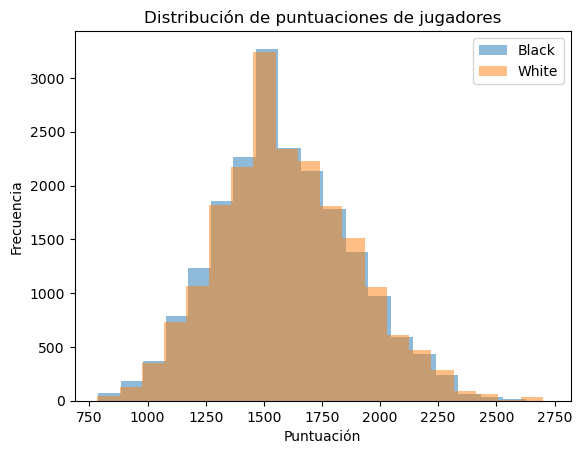

In [37]:
plt.hist(df['black_rating'], bins=20, alpha=0.5, label='Black')
plt.hist(df['white_rating'], bins=20, alpha=0.5, label='White')

plt.xlabel('Puntuación')
plt.ylabel('Frecuencia')
plt.title('Distribución de puntuaciones de jugadores')
plt.legend(loc='upper right')

plt.show()

En el boxplot se puede observar que la mayoria de los jugadores tienen un rating entre 1300 y 1800 aproximadamente.

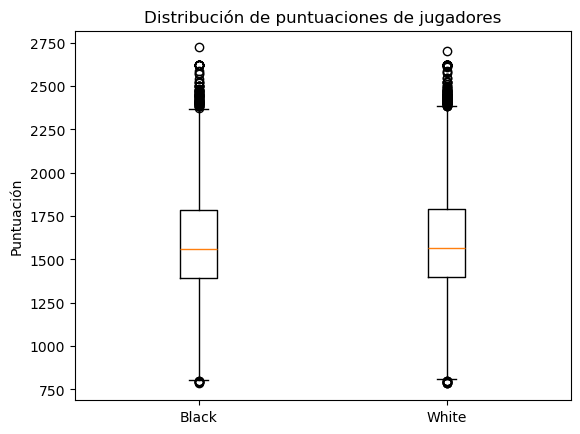

In [38]:
plt.boxplot([df['black_rating'], df['white_rating']], labels=['Black', 'White'])
plt.ylabel('Puntuación')
plt.title('Distribución de puntuaciones de jugadores')

plt.show()